In [1]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
%load_ext autoreload
%autoreload 2


# Import modules created for this project
import project_modules.calibrate_camera as cc
import project_modules.image_process as ip
import project_modules.find_lanes as fl

In [2]:
# Image procss pipeline
def image_process_pipeline(img, imgpoints, objpoints):
    img = ip.undistort_image(img, imgpoints, objpoints)
    img = ip.color_gradient_threshold(img)
    img, Minv = ip.perspective_transform(img)    
    return img, Minv

In [3]:
image_names = cc.get_calibration_image_names()
imgpoints, objpoints = cc.calibrate_camera(image_names)

In [4]:
images = ['./test_images/test4.jpg', './test_images/test5.jpg', './test_images/test6.jpg']
img = cv2.imread(images[0])
processed_img, Minv = image_process_pipeline(img, imgpoints, objpoints)
out_img, left_fit, right_fit, left_lane_inds, right_lane_inds = fl.find_lanes(processed_img)

img = cv2.imread(images[1])
processed_img, Minv = image_process_pipeline(img, imgpoints, objpoints)
out_img, left_fit2, right_fit2, left_lane_inds, right_lane_inds = fl.find_lanes_next(processed_img, left_fit, right_fit)

ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )   
left_fitx = left_fit2[0]*ploty**2 + left_fit2[1]*ploty + left_fit2[2]
right_fitx = right_fit2[0]*ploty**2 + right_fit2[1]*ploty + right_fit2[2]

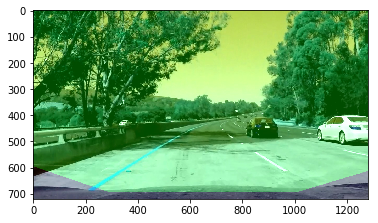

In [5]:
result= fl.draw_lane_image(img, processed_img, left_fitx, right_fitx, Minv)
plt.imshow(result)